<a href="https://colab.research.google.com/github/BogdanT54/Serii-de-Timp/blob/main/Analiza_S%26P500_Proiect_SERII_TIMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Instalează pachetele necesare (rulat o singură dată)
!pip3 install yfinance statsmodels arch seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 13.4 MB/s eta 0:00:00


In [5]:
# Importuri
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller, kpss
from google.colab import files
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')

In [13]:
#Fac un dataframe cu fisierul dat
sp500 = pd.read_csv('sp500.csv', index_col=0, parse_dates=True)

#Verific Df-ul
sp500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [23]:
#Prelucram randamentele logaritmice si curatam valorile lipsa
sp500_log_returns = np.log(sp500 / sp500.shift(1)).replace([np.inf, -np.inf], np.nan).dropna()

#Afisez
sp500_log_returns.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-24,-0.000711,-0.005347,-0.002391,0.001221,0.079516,0.001221
2015-11-25,-0.000535,0.007703,0.002339,-0.000129,-0.308755,-0.000129
2015-11-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-11-27,0.000139,-0.001041,-0.000230,0.000593,-0.665240,0.000593
2015-11-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


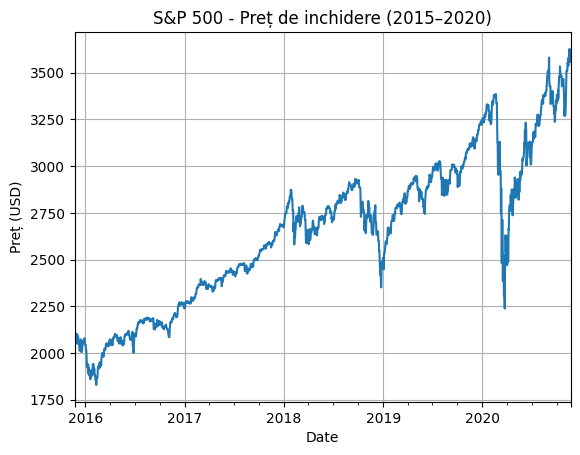

In [24]:
# Plot - Preț ajustat real
sp500['Close'].plot(title='S&P 500 - Preț de inchidere (2015–2020)')
plt.ylabel("Preț (USD)")
plt.grid(True)
plt.show()

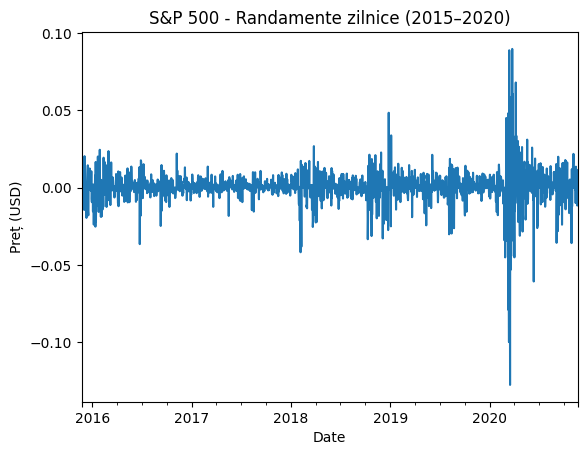

In [25]:
# Plot - Preț ajustat randamente logartimice
sp500_log_returns['Close'].plot(title='S&P 500 - Randamente zilnice (2015–2020)')
plt.ylabel("Preț (USD)")
plt.show()

In [29]:
# Testul ADF
def adf_test(series, title=''):
    print(f'--- Testul ADF {title} ---')
    result = adfuller(series, autolag='AIC')
    print(f'Statistică ADF: {result[0]:.4f}')
    print(f'P-valoare: {result[1]:.4f}')
    print(f'Laguri folosite: {result[2]}')
    print('Staționaritate' if result[1] < 0.05 else 'Nestaționară')
    print('-----------------------------\n')

# Testul KPSS
def kpss_test(series, title=''):
    print(f'--- Testul KPSS {title} ---')
    result = kpss(series, regression='c', nlags='auto')
    print(f'Statistică KPSS: {result[0]:.4f}')
    print(f'P-valoare: {result[1]:.4f}')
    print(f'Laguri folosite: {result[2]}')
    print('Staționaritate' if result[1] > 0.05 else 'Nestaționară')
    print('-----------------------------\n')

#Testul PP
def pp_test(series, title=''):
    print(f'--- Testul Phillips-Perron {title} ---')
    result = ts.adfuller(series, regression='ct')  #ct pentru trend
    print(f'Statistică PP: {result[0]:.4f}')
    print(f'P-valoare: {result[1]:.4f}')
    print(f'Laguri folosite: {result[2]}')
    print('Staționaritate' if result[1] < 0.05 else 'Nestaționară')
    print('-----------------------------\n')

In [31]:
# Aplicare teste pret close
adf_test(sp500['Close'], title='(Preț S&P 500)')
kpss_test(sp500['Close'], title='(Preț S&P 500)')
pp_test(sp500['Close'], title='(Preț S&P 500)')

# Aplicare teste randamente logaritmice
adf_test(sp500_log_returns['Close'], title='(Randamente logartimice S&P 500)')
kpss_test(sp500_log_returns['Close'], title='(Randamente logartimice S&P 500)')
pp_test(sp500_log_returns['Close'], title='(Randamente logartimice S&P 500)')

--- Testul ADF (Preț S&P 500) ---
Statistică ADF: -0.8704
P-valoare: 0.7976
Laguri folosite: 23
Nestaționară
-----------------------------

--- Testul KPSS (Preț S&P 500) ---
Statistică KPSS: 5.8586
P-valoare: 0.0100
Laguri folosite: 27
Nestaționară
-----------------------------

--- Testul Phillips-Perron (Preț S&P 500) ---
Statistică PP: -4.1733
P-valoare: 0.0049
Laguri folosite: 23
Staționaritate
-----------------------------

--- Testul ADF (Randamente logartimice S&P 500) ---
Statistică ADF: -8.4389
P-valoare: 0.0000
Laguri folosite: 24
Staționaritate
-----------------------------

--- Testul KPSS (Randamente logartimice S&P 500) ---
Statistică KPSS: 0.0298
P-valoare: 0.1000
Laguri folosite: 2
Staționaritate
-----------------------------

--- Testul Phillips-Perron (Randamente logartimice S&P 500) ---
Statistică PP: -8.4373
P-valoare: 0.0000
Laguri folosite: 24
Staționaritate
-----------------------------



<Figure size 1000x500 with 0 Axes>

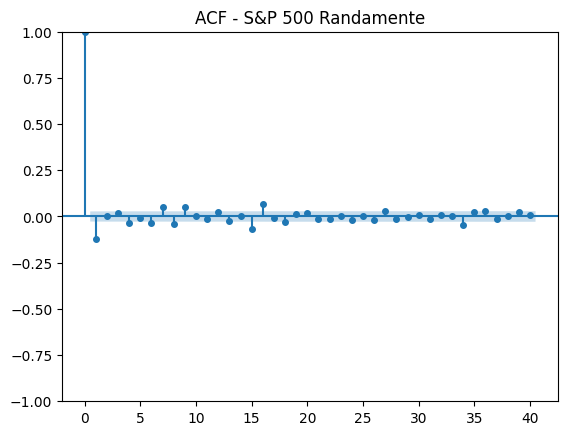

<Figure size 1000x500 with 0 Axes>

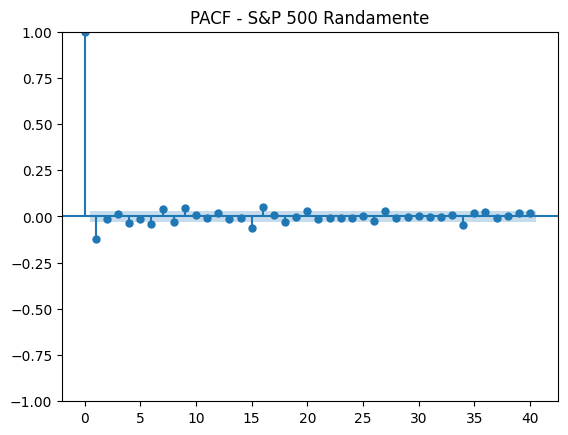

In [ ]:
# Asigură-te că randamentele sunt curățate
sp500_returns = sp500.pct_change().replace([np.inf, -np.inf], np.nan).dropna()
sp500_log_returns = np.log(sp500 / sp500.shift(1)).replace([np.inf, -np.inf], np.nan).dropna()

# ACF (pentru q – partea MA)
plt.figure(figsize=(10, 5))
plot_acf(sp500_log_returns, lags=40, markersize=4)
plt.title('ACF - S&P 500 Randamente')
plt.show()

# PACF (pentru p – partea AR)
plt.figure(figsize=(10, 5))
plot_pacf(sp500_log_returns, lags=40, alpha=0.05, method='ywm')
plt.title('PACF - S&P 500 Randamente')
plt.show()

In [ ]:
model = ARIMA(sp500_returns, order=(1, 0, 1))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:            Close_^GSPC   No. Observations:                 5092
Model:                 ARIMA(1, 0, 1)   Log Likelihood               15312.087
Date:                Tue, 15 Apr 2025   AIC                         -30616.175
Time:                        19:39:19   BIC                         -30590.033
Sample:                             0   HQIC                        -30607.021
                               - 5092                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.407      0.016    6.95e-05       0.001
ar.L1         -0.0090      0.042     -0.212      0.832      -0.092       0.074
ma.L1         -0.1167      0.043     -2.716      0.0

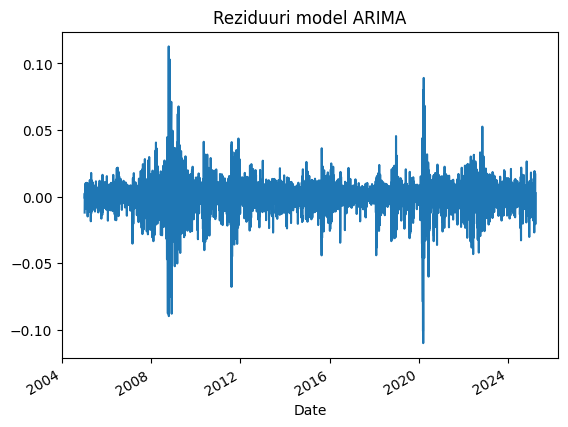

In [ ]:
resid = fitted.resid
resid.plot(title='Reziduuri model ARIMA')
plt.show()

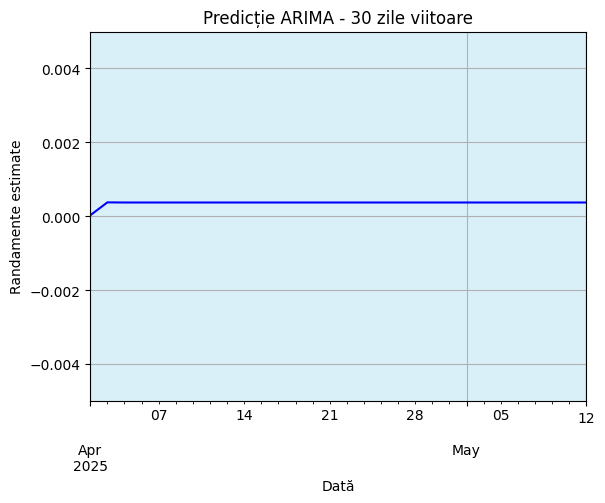

In [ ]:
forecast = fitted.get_forecast(steps=30)
forecast_df = forecast.summary_frame()

# Setăm index cu date reale
last_date = sp500_returns.index[-1]
forecast_df.index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')

# Plot mai clar
forecast_df['mean'].plot(title='Predicție ARIMA - 30 zile viitoare', color='blue')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='skyblue', alpha=0.3)
plt.ylabel('Randamente estimate')
plt.xlabel('Dată')
plt.grid(True)
plt.ylim(-0.005, 0.005)  # zoom pe variație mică (~±0.5%)
plt.show()


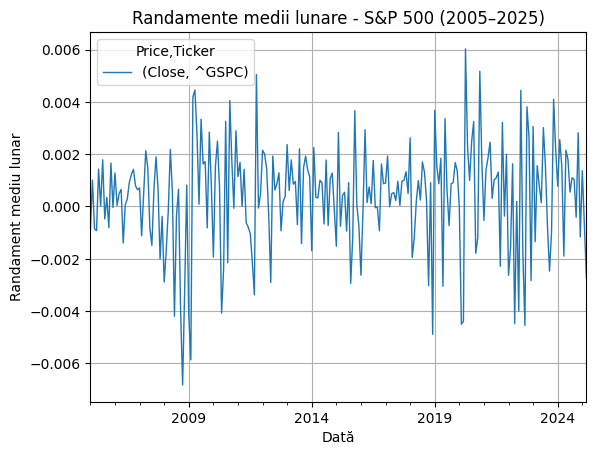

In [ ]:
# Agregăm randamentele la nivel de lună calendaristică
sp500_monthly_returns = sp500_returns.resample('M').mean()

# Line chart pentru întreaga perioadă 2005–2025
sp500_monthly_returns.plot(title='Randamente medii lunare - S&P 500 (2005–2025)', linewidth=1)
plt.ylabel('Randament mediu lunar')
plt.xlabel('Dată')
plt.grid(True)
plt.show()


=== SARIMA pe Randamente Trimestriale ===
                                     SARIMAX Results                                     
Dep. Variable:                       Close_^GSPC   No. Observations:                   81
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 4)   Log Likelihood                 426.613
Date:                           Tue, 15 Apr 2025   AIC                           -843.226
Time:                                   19:47:51   BIC                           -831.254
Sample:                               03-31-2005   HQIC                          -838.422
                                    - 03-31-2025                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4294      0.647      0.664      0.507      -0.838       1.697
m

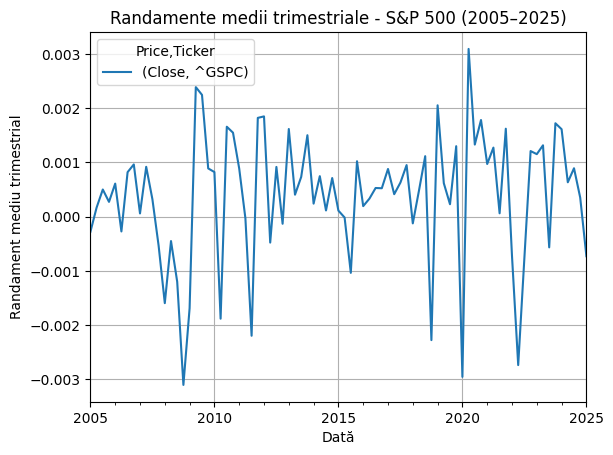

In [ ]:
# Randamente medii trimestriale
quarterly_returns = sp500_returns.resample('Q').mean().dropna()

# SARIMA(p,d,q)(P,D,Q,s) → alegem p=1, d=0, q=1 și sezonalitate s=4 (trimestrială)
model_q = SARIMAX(quarterly_returns, order=(1, 0, 1), seasonal_order=(1, 0, 1, 4))
results_q = model_q.fit(disp=False)

# Rezumat
print("=== SARIMA pe Randamente Trimestriale ===")
print(results_q.summary())

# Plot evoluție în timp
sp500_quarterly_returns.plot(title='Randamente medii trimestriale - S&P 500 (2005–2025)', linewidth=1.5)
plt.ylabel('Randament mediu trimestrial')
plt.xlabel('Dată')
plt.grid(True)
plt.show()

In [ ]:
from arch import arch_model

# Pregătire: randamente logaritmice curate
sp500_log_returns = np.log(sp500 / sp500.shift(1)).replace([np.inf, -np.inf], np.nan).dropna()

# Model GARCH(1,1) fără constantă în media (mean='Zero')
garch_model = arch_model(sp500_log_returns, vol='GARCH', p=1, q=1, mean='Zero')
garch_fitted = garch_model.fit(disp='off')

# Rezumat
print(garch_fitted.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:     ('Close', '^GSPC')   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                16630.2
Distribution:                  Normal   AIC:                          -33254.4
Method:            Maximum Likelihood   BIC:                          -33234.8
                                        No. Observations:                 5092
Date:                Tue, Apr 15 2025   Df Residuals:                     5092
Time:                        19:49:59   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.9219e-06  2.711e-13  1.078e+07      0.000 [2.

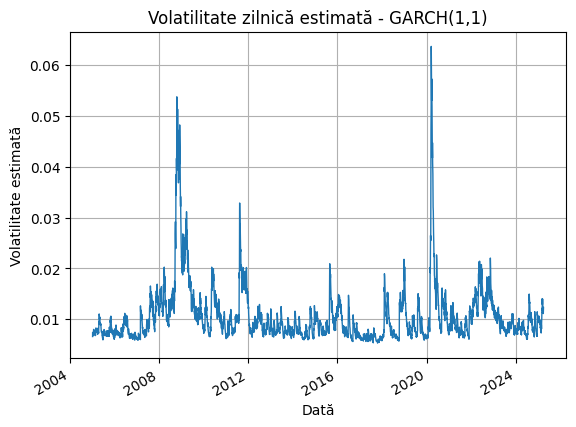

In [ ]:
# Plot volatilitate condițională (volatilitatea estimată în fiecare zi)
garch_fitted.conditional_volatility.plot(title='Volatilitate zilnică estimată - GARCH(1,1)', linewidth=1)
plt.ylabel('Volatilitate estimată')
plt.xlabel('Dată')
plt.grid(True)
plt.show()

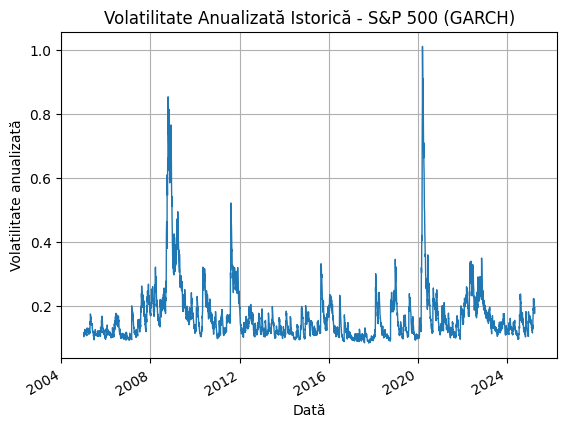

In [ ]:
# Volatilitate anualizată istorică
vol_anualizata_istoric = garch_fitted.conditional_volatility * np.sqrt(252)

# Plot istoric
vol_anualizata_istoric.plot(title='Volatilitate Anualizată Istorică - S&P 500 (GARCH)', linewidth=1)
plt.ylabel('Volatilitate anualizată')
plt.xlabel('Dată')
plt.grid(True)
plt.show()

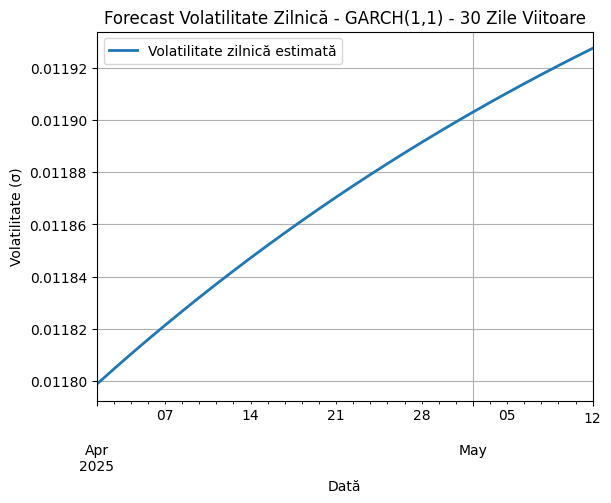

In [ ]:
# Forecast volatilitate pentru 30 de zile viitoare
garch_forecast = garch_fitted.forecast(horizon=30)

# Extragem volatilitatea condițională (deviația standard)
forecast_vol = np.sqrt(garch_forecast.variance.values[-1, :])

# Creăm un index de date pentru următoarele 30 de zile lucrătoare
last_date = sp500_log_returns.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')

# Salvăm într-un DataFrame
forecast_df = pd.DataFrame({
    'Volatilitate zilnică estimată': forecast_vol
}, index=forecast_dates)

# Plot
forecast_df.plot(title='Forecast Volatilitate Zilnică - GARCH(1,1) - 30 Zile Viitoare', linewidth=2)
plt.ylabel('Volatilitate (σ)')
plt.xlabel('Dată')
plt.grid(True)
plt.show()

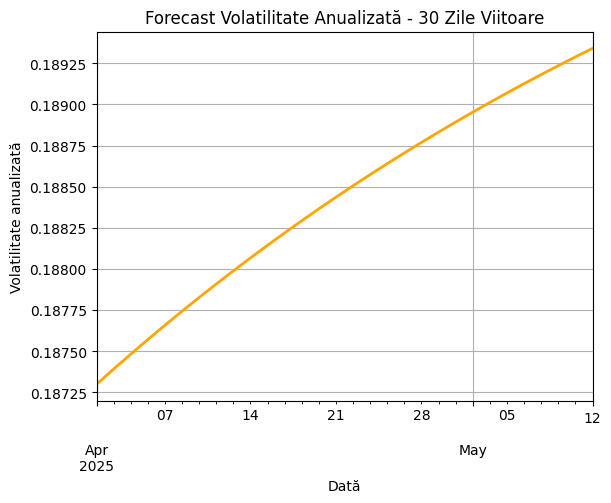

In [ ]:
# Forecast anualizat
forecast_df['Volatilitate anualizată estimată'] = forecast_df['Volatilitate zilnică estimată'] * np.sqrt(252)

# Plot
forecast_df['Volatilitate anualizată estimată'].plot(title='Forecast Volatilitate Anualizată - 30 Zile Viitoare', linewidth=2, color='orange')
plt.ylabel('Volatilitate anualizată')
plt.xlabel('Dată')
plt.grid(True)
plt.show()

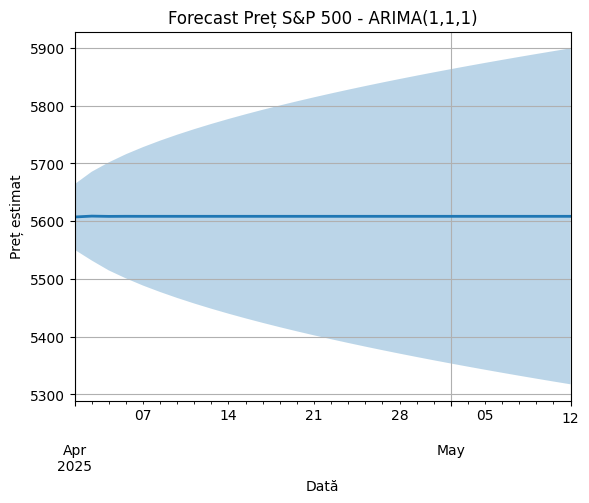

In [ ]:
# Model ARIMA(1,1,1) pentru preț (diferențiere o dată - d=1)
model_price = ARIMA(sp500, order=(1,1,1))
fitted_price = model_price.fit()

# Forecast pentru 30 zile viitoare
forecast_price = fitted_price.get_forecast(steps=30)
forecast_price_df = forecast_price.summary_frame()

# Generăm index de date viitoare
forecast_price_df.index = pd.date_range(start=sp500.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')

# Plot
forecast_price_df['mean'].plot(title='Forecast Preț S&P 500 - ARIMA(1,1,1)', linewidth=2)
plt.fill_between(forecast_price_df.index, forecast_price_df['mean_ci_lower'], forecast_price_df['mean_ci_upper'], alpha=0.3)
plt.ylabel('Preț estimat')
plt.xlabel('Dată')
plt.grid(True)
plt.show()